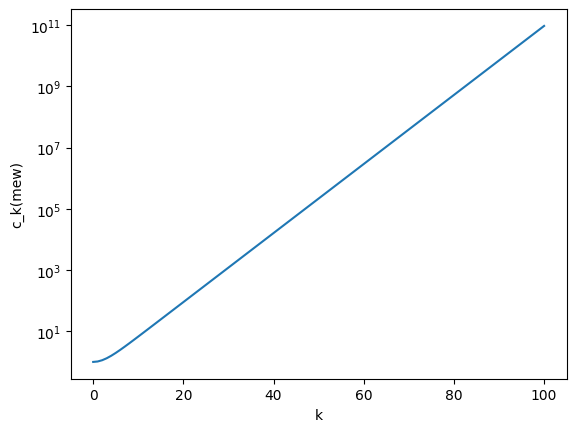

In [ ]:
import numpy as np
from numpy.polynomial import Chebyshev
import matplotlib.pyplot as plt


ks = range(101)
alpha = -2
beta = 0.95
points = []
mew = 1 + 2*((1 - beta)/(beta-alpha))
for k in ks:
    points.append(Chebyshev.basis(k)(mew))
    
plt.plot(ks, points)
plt.yscale('log', base=10)
plt.xlabel("k")
plt.ylabel("c_k(mew)")
plt.show()

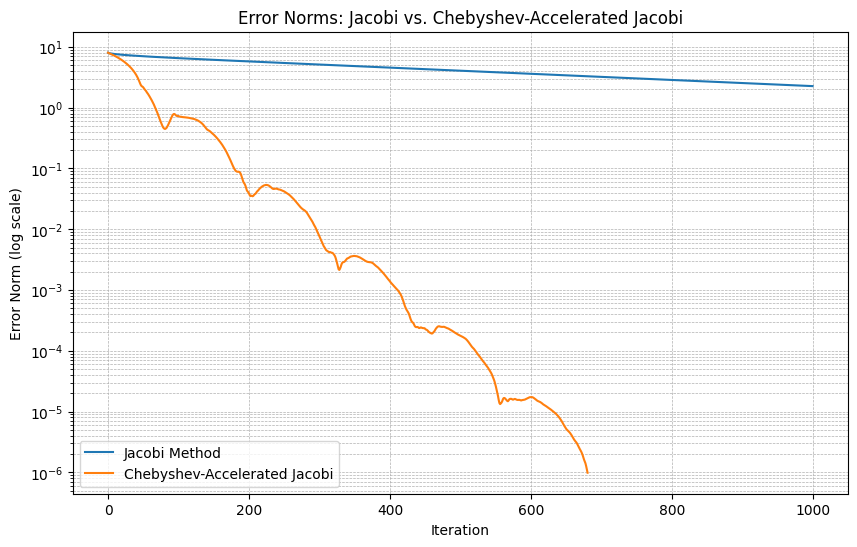

In [3]:
# Define matrix A and vector b
n = 64
A = np.zeros((n, n))
for i in range(n):
    A[i, i] = 2  # Diagonal elements
    if i > 0:
        A[i, i - 1] = -1  # Sub-diagonal elements
    if i < n - 1:
        A[i, i + 1] = -1  # Super-diagonal elements
b = np.ones(n)

# Define parameters for Chebyshev acceleration
beta = 0.999
alpha = -0.999
mu = 1 + 2 * (1 - beta) / (beta - alpha)
gamma = 2 / (2 - beta - alpha)

# Define tolerance and maximum iterations
tol = 1e-6
max_iter = 1000

# Initialize variables
x_jacobi = np.zeros_like(b)  # Initial guess for standard Jacobi
x_chebyshev = np.zeros_like(b)  # Initial guess for Chebyshev-accelerated Jacobi
error_norms_jacobi = []  # Error norms for standard Jacobi
error_norms_chebyshev = []  # Error norms for Chebyshev-accelerated Jacobi

# Precompute for Jacobi splitting
M_inv = np.diag(1 / np.diag(A))  # Inverse of diagonal of A
N = A - np.diag(np.diag(A))  # Off-diagonal of A

# Jacobi method
for _ in range(max_iter):
    r_jacobi = b - A @ x_jacobi  # Residual
    error_norms_jacobi.append(np.linalg.norm(r_jacobi))
    if np.linalg.norm(r_jacobi) < tol:
        break
    x_jacobi = M_inv @ (b - N @ x_jacobi)

# Initialize Chebyshev variables
y_prev = np.zeros_like(b)
y_curr = np.zeros_like(b)
r = b - A @ y_curr
c_prev = 1
c_curr = mu

# Optimize Chebyshev splitting step by replacing np.linalg.solve with element-wise division
diag_A_inv = 1 / np.diag(A)  # Precompute the inverse of the diagonal elements of A

# Chebyshev-accelerated Jacobi
for k in range(1, max_iter + 1):
    r = b - A @ y_curr
    error_norms_chebyshev.append(np.linalg.norm(r))
    if np.linalg.norm(r) < tol:
        break

    c_next = 2 * mu * c_curr - c_prev  # Update c_k
    omega_k = 2 / (beta - alpha) * c_curr / c_next  # Update omega_k

    z = diag_A_inv * r  # Solve Mz = r (optimized using element-wise division)
    y_next = y_curr + omega_k * (y_curr - y_prev + gamma * z)

    # Update variables for next iteration
    y_prev, y_curr = y_curr, y_next
    c_prev, c_curr = c_curr, c_next

# Plot error norms
plt.figure(figsize=(10, 6))
plt.plot(error_norms_jacobi, label="Jacobi Method")
plt.plot(error_norms_chebyshev, label="Chebyshev-Accelerated Jacobi")
plt.yscale("log")
plt.xlabel("Iteration")
plt.ylabel("Error Norm (log scale)")
plt.title("Error Norms: Jacobi vs. Chebyshev-Accelerated Jacobi")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

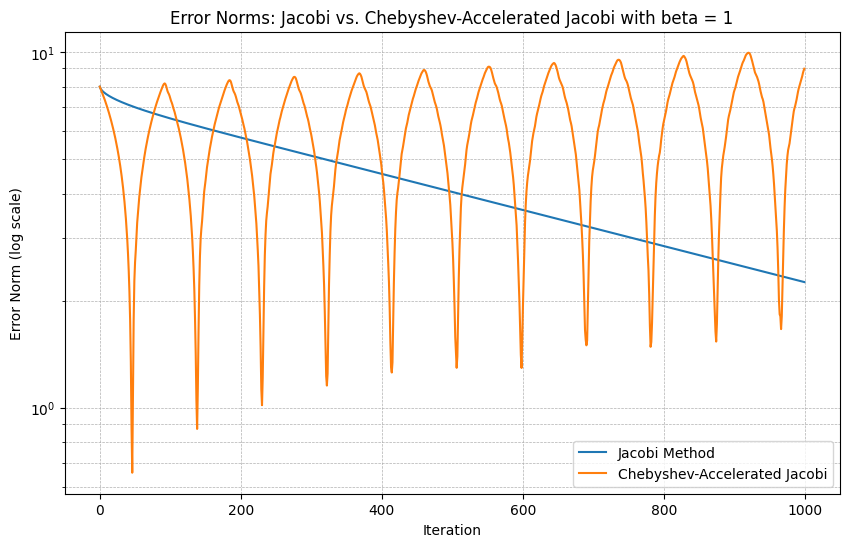

In [19]:
# Define matrix A and vector b
n = 64
A = np.zeros((n, n))
for i in range(n):
    A[i, i] = 2  # Diagonal elements
    if i > 0:
        A[i, i - 1] = -1  # Sub-diagonal elements
    if i < n - 1:
        A[i, i + 1] = -1  # Super-diagonal elements
b = np.ones(n)

# Define parameters for Chebyshev acceleration
beta = 1
alpha = -0.999
mu = 1 + 2 * (1 - beta) / (beta - alpha)
gamma = 2 / (2 - beta - alpha)

# Define tolerance and maximum iterations
tol = 1e-6
max_iter = 1000

# Initialize variables
x_jacobi = np.zeros_like(b)  # Initial guess for standard Jacobi
x_chebyshev = np.zeros_like(b)  # Initial guess for Chebyshev-accelerated Jacobi
error_norms_jacobi = []  # Error norms for standard Jacobi
error_norms_chebyshev = []  # Error norms for Chebyshev-accelerated Jacobi

# Precompute for Jacobi splitting
M_inv = np.diag(1 / np.diag(A))  # Inverse of diagonal of A
N = A - np.diag(np.diag(A))  # Off-diagonal of A

# Jacobi method
for _ in range(max_iter):
    r_jacobi = b - A @ x_jacobi  # Residual
    error_norms_jacobi.append(np.linalg.norm(r_jacobi))
    if np.linalg.norm(r_jacobi) < tol:
        break
    x_jacobi = M_inv @ (b - N @ x_jacobi)

# Initialize Chebyshev variables
y_prev = np.zeros_like(b)
y_curr = np.zeros_like(b)
r = b - A @ y_curr
c_prev = 1
c_curr = mu

# Optimize Chebyshev splitting step by replacing np.linalg.solve with element-wise division
diag_A_inv = 1 / np.diag(A)  # Precompute the inverse of the diagonal elements of A

# Chebyshev-accelerated Jacobi
for k in range(1, max_iter + 1):
    r = b - A @ y_curr
    error_norms_chebyshev.append(np.linalg.norm(r))
    if np.linalg.norm(r) < tol:
        break

    c_next = 2 * mu * c_curr - c_prev  # Update c_k
    omega_k = 2 / (beta - alpha) * c_curr / c_next  # Update omega_k

    z = diag_A_inv * r  # Solve Mz = r (optimized using element-wise division)
    y_next = y_curr + omega_k * (y_curr - y_prev + gamma * z)

    # Update variables for next iteration
    y_prev, y_curr = y_curr, y_next
    c_prev, c_curr = c_curr, c_next

# Plot error norms
plt.figure(figsize=(10, 6))
plt.plot(error_norms_jacobi, label="Jacobi Method")
plt.plot(error_norms_chebyshev, label="Chebyshev-Accelerated Jacobi")
plt.yscale("log")
plt.xlabel("Iteration")
plt.ylabel("Error Norm (log scale)")
plt.title("Error Norms: Jacobi vs. Chebyshev-Accelerated Jacobi with beta = 1")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

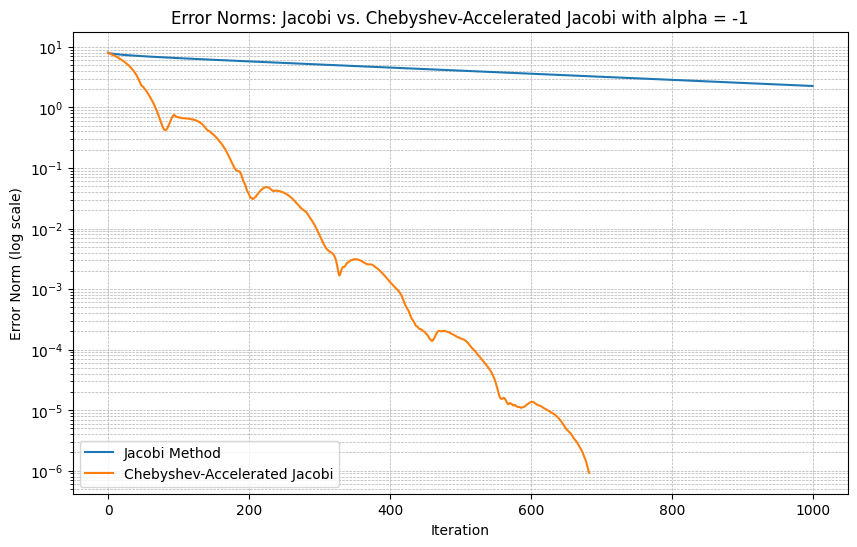

In [15]:
# Define matrix A and vector b
n = 64
A = np.zeros((n, n))
for i in range(n):
    A[i, i] = 2  # Diagonal elements
    if i > 0:
        A[i, i - 1] = -1  # Sub-diagonal elements
    if i < n - 1:
        A[i, i + 1] = -1  # Super-diagonal elements
b = np.ones(n)

# Define parameters for Chebyshev acceleration
beta = 0.999
alpha = -1
mu = 1 + 2 * (1 - beta) / (beta - alpha)
gamma = 2 / (2 - beta - alpha)

# Define tolerance and maximum iterations
tol = 1e-6
max_iter = 1000

# Initialize variables
x_jacobi = np.zeros_like(b)  # Initial guess for standard Jacobi
x_chebyshev = np.zeros_like(b)  # Initial guess for Chebyshev-accelerated Jacobi
error_norms_jacobi = []  # Error norms for standard Jacobi
error_norms_chebyshev = []  # Error norms for Chebyshev-accelerated Jacobi

# Precompute for Jacobi splitting
M_inv = np.diag(1 / np.diag(A))  # Inverse of diagonal of A
N = A - np.diag(np.diag(A))  # Off-diagonal of A

# Jacobi method
for _ in range(max_iter):
    r_jacobi = b - A @ x_jacobi  # Residual
    error_norms_jacobi.append(np.linalg.norm(r_jacobi))
    if np.linalg.norm(r_jacobi) < tol:
        break
    x_jacobi = M_inv @ (b - N @ x_jacobi)

# Initialize Chebyshev variables
y_prev = np.zeros_like(b)
y_curr = np.zeros_like(b)
r = b - A @ y_curr
c_prev = 1
c_curr = mu

# Optimize Chebyshev splitting step by replacing np.linalg.solve with element-wise division
diag_A_inv = 1 / np.diag(A)  # Precompute the inverse of the diagonal elements of A

# Chebyshev-accelerated Jacobi
for k in range(1, max_iter + 1):
    r = b - A @ y_curr
    error_norms_chebyshev.append(np.linalg.norm(r))
    if np.linalg.norm(r) < tol:
        break

    c_next = 2 * mu * c_curr - c_prev  # Update c_k
    omega_k = 2 / (beta - alpha) * c_curr / c_next  # Update omega_k

    z = diag_A_inv * r  # Solve Mz = r (optimized using element-wise division)
    y_next = y_curr + omega_k * (y_curr - y_prev + gamma * z)

    # Update variables for next iteration
    y_prev, y_curr = y_curr, y_next
    c_prev, c_curr = c_curr, c_next

# Plot error norms
plt.figure(figsize=(10, 6))
plt.plot(error_norms_jacobi, label="Jacobi Method")
plt.plot(error_norms_chebyshev, label="Chebyshev-Accelerated Jacobi")
plt.yscale("log")
plt.xlabel("Iteration")
plt.ylabel("Error Norm (log scale)")
plt.title("Error Norms: Jacobi vs. Chebyshev-Accelerated Jacobi with alpha = -1")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()